# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
#Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler



# Challenge 1 - Import and Describe the Dataset

#### In this challenge we will use the `austin_weather` data. 

#### First, import it into a data frame called `austin`. 

- **Date** (YYYY-MM-DD)
- **TempHighF**: High temperature, in Fahrenheit
- **TempAvgF**: Average temperature, in Fahrenheit
- **TempLowF**: Low temperature, in Fahrenheit
- **DewPointHighF**: High dew point, in Fahrenheit
- **DewPointAvgF**: Average dew point, in Fahrenheit
- **DewPointLowF**: Low dew point, in Fahrenheit
- **HumidityHighPercent**: High humidity, as a percentage
- **HumidityAvgPercent**: Average humidity, as a percentage
- **HumidityLowPercent**: Low humidity, as a percentage
- **SeaLevelPressureHighInches**: High sea level pressure, in inches
- **SeaLevelPressureAvgInches**: Average sea level pressure, in inches
- **SeaLevelPressureLowInches**: Low sea level pressure, in inches
- **VisibilityHighMiles**: High visibility, in miles
- **VisibilityAvgMiles**: Average visibility, in miles
- **VisibilityLowMiles**: Low visibility, in miles
- **WindHighMPH**: High wind speed, in miles per hour
- **WindAvgMPH**: Average wind speed, in miles per hour
- **WindGustMPH**: Highest wind speed gust, in miles per hour
- **PrecipitationSumInches**: Total precipitation, in inches ('T' if Trace)
- **Events**: Adverse weather events (' ' if None)

This dataset contains data for every date from 2013-12-21 to 2017-07-31.


In [3]:
# Your code here
austin = pd.read_csv("C:/Users/astri/Ironhack/Labs/lab-intro-to-ml/your-code/austin_weather.csv")
austin.head()


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


#### Next, describe the dataset you have loaded: 
- Look at the variables and their types
- Examine the descriptive statistics of the numeric variables 
- Look at the first five rows of all variables to evaluate the categorical variables as well

In [5]:
# Your code here: Look at the variables and their types
austin.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [7]:
# Examine the descriptive statistics of the numeric variables
cat = austin.select_dtypes(exclude="number")
num = austin.select_dtypes(include="number")

In [9]:
num.columns

Index(['TempHighF', 'TempAvgF', 'TempLowF'], dtype='object')

In [11]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
TempHighF,1319.0,80.862775,14.766523,32.0,72.0,83.0,92.0,107.0
TempAvgF,1319.0,70.642911,14.045904,29.0,62.0,73.0,83.0,93.0
TempLowF,1319.0,59.902957,14.190648,19.0,49.0,63.0,73.0,81.0


In [13]:
#Look at the first five rows of all variables to evaluate the categorical variables as well.
cat.columns

Index(['Date', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF',
       'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

#### Given the information you have learned from examining the dataset, write down three insights about the data in a markdown cell below

#### Your Insights:

1. There are 21 variables in the dataset. 3 of them are numeric and the rest contain some text.

2. The average temperature in Austin ranged between around 70 degrees F and around 93 degrees F. The highest temperature observed during this period was 107 degrees F and the lowest was 19 degrees F.

3. When we look at the head function, we see that a lot of variables contain numeric data even though these columns are of object type. This means we might have to do some data cleansing.


#### Let's examine the DewPointAvgF variable by using the `unique()` function to list all unique values in this dataframe.

Describe what you find in a markdown cell below the code. What did you notice? What do you think made Pandas to treat this column as *object* instead of *int64*? 

In [15]:
# Your code here
austin.DewPointAvgF.nunique()

66

In [17]:
austin.DewPointAvgF.unique()

array(['49', '36', '27', '28', '40', '39', '41', '26', '42', '22', '48',
       '32', '8', '11', '45', '55', '61', '37', '47', '25', '23', '20',
       '33', '30', '29', '17', '14', '13', '54', '59', '15', '24', '34',
       '35', '57', '50', '53', '60', '46', '56', '51', '31', '38', '62',
       '43', '63', '64', '67', '66', '58', '70', '68', '65', '69', '71',
       '72', '-', '73', '74', '21', '44', '52', '12', '75', '76', '18'],
      dtype=object)

In [ ]:
# Your observation here
#We can see that this is seperate as a categorical but is really a numerical because is giving us the Average dew point, in Fahrenheit. 
#The DewPointAvgF is the temperature to which it must be cooled to become saturated with water vapor. 

The following is a list of columns misrepresented as `object`. Use this list to convert the columns to numeric using the `pandas.to_numeric` function in the next cell. If you encounter errors in converting strings to numeric values, you need to catch those errors and force the conversion by supplying `errors='coerce'` as an argument for `pandas.to_numeric`. Coercing will replace non-convertable elements with `NaN` which represents an undefined numeric value. This makes it possible for us to conveniently handle missing values in subsequent data processing.

*Hint: you may use a loop to change one column at a time but it is more efficient to use `apply`.*

In [19]:
wrong_type_columns = ['DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 
                      'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 
                      'SeaLevelPressureAvgInches' ,'SeaLevelPressureLowInches', 'VisibilityHighMiles',
                      'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 
                      'WindGustMPH', 'PrecipitationSumInches']

In [21]:
# Your code here
for col in wrong_type_columns:
    austin[col] = pd.to_numeric(austin[col], errors='coerce')

#### Check if your code has worked by printing the data types again. You should see only two `object` columns (`Date` and `Events`) now. All other columns should be `int64` or `float64`.

In [23]:
# Your code here
austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1312 non-null   float64
 5   DewPointAvgF                1312 non-null   float64
 6   DewPointLowF                1312 non-null   float64
 7   HumidityHighPercent         1317 non-null   float64
 8   HumidityAvgPercent          1317 non-null   float64
 9   HumidityLowPercent          1317 non-null   float64
 10  SeaLevelPressureHighInches  1316 non-null   float64
 11  SeaLevelPressureAvgInches   1316 non-null   float64
 12  SeaLevelPressureLowInches   1316 non-null   float64
 13  VisibilityHighMiles         1307 

# Challenge 2 - Handle the Missing Data

#### Now that we have fixed the type mismatch, let's address the missing data.

By coercing the columns to numeric, we have created `NaN` for each cell containing characters. We should choose a strategy to address these missing data.

The first step is to examine how many rows contain missing data.

We check how much missing data we have by applying the `.isnull()` function to our dataset. To find the rows with missing data in any of its cells, we apply `.any(axis=1)` to the function. `austin.isnull().any(axis=1)` will return a column containing true if the row contains at least one missing value and false otherwise. Therefore we must subset our dataframe with this column. This will give us all rows with at least one missing value. 

#### In the next cell, identify all rows containing at least one missing value. Assign the dataframes with missing values to a variable called `missing_values`.

In [25]:
# Your code here 
missing_values = austin[austin.isnull().any(axis=1)]


In [27]:
missing_values.info()


<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 4 to 1313
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        136 non-null    object 
 1   TempHighF                   136 non-null    int64  
 2   TempAvgF                    136 non-null    int64  
 3   TempLowF                    136 non-null    int64  
 4   DewPointHighF               129 non-null    float64
 5   DewPointAvgF                129 non-null    float64
 6   DewPointLowF                129 non-null    float64
 7   HumidityHighPercent         134 non-null    float64
 8   HumidityAvgPercent          134 non-null    float64
 9   HumidityLowPercent          134 non-null    float64
 10  SeaLevelPressureHighInches  133 non-null    float64
 11  SeaLevelPressureAvgInches   133 non-null    float64
 12  SeaLevelPressureLowInches   133 non-null    float64
 13  VisibilityHighMiles         124 non-nul

There are multiple strategies to handle missing data. Below lists the most common ones data scientists use:

* Removing all rows or all columns containing missing data. This is the simplest strategy. It may work in some cases but not others.

* Filling all missing values with a placeholder value. 
    * For categorical data, `0`, `-1`, and `9999` are some commonly used placeholder values. 
    * For continuous data, some may opt to fill all missing data with the mean. This strategy is not optimal since it can increase the fit of the model.

* Filling the values using some algorithm. 

#### In our case, we will use a hybrid approach which is to first remove the data that contain most missing values then fill in the rest of the missing values with the *linear interpolation* algorithm.

#### Next, count the number of rows of `austin` and `missing_values`.

In [29]:
# Your code here
austin.shape

(1319, 21)

In [31]:
missing_values.shape


(136, 21)

#### Calculate the ratio of missing rows to total rows

In [33]:
# Your code here
ratio = (len(missing_values)/ len(austin)) * 100
ratio

10.310841546626232

As you can see, there is a large proportion of missing data (over 10%). Perhaps we should evaluate which columns have the most missing data and remove those columns. For the remaining columns, we will perform a linear approximation of the missing data.

We can find the number of missing rows in each column using the `.isna()` function. We then chain the `.sum` function to the `.isna()` function and find the number of missing rows per column

In [35]:
# Your code here
missing_values.isna().sum()


Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   7
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

#### As you can see from the output, the majority of missing data is in one column called `PrecipitationSumInches`. What's the number of missing values in this column in ratio to its total number of rows?

In [37]:
# Contar valores NaN en una columna específica
nan_count = missing_values['DewPointHighF'].isnull().sum()
print(nan_count)


7


In [39]:
# Your code here
ratio_PrecipitationSumInches = 124/len(missing_values) *100
ratio_PrecipitationSumInches

91.17647058823529

In [41]:
missing_values.PrecipitationSumInches.unique()

array([nan, 0. , 0.2])

Almost 10% data missing! Therefore, we prefer to remove this column instead of filling its missing values. 

#### Remove this column from `austin` using the `.drop()` function. Use the `inplace=True` argument.

*Hints:*

* By supplying `inplace=True` to `drop()`, the original dataframe object will be changed in place and the function will return `None`. In contrast, if you don't supply `inplace=True`, which is equivalent to supplying `inplace=False` because `False` is the default value, the original dataframe object will be kept and the function returns a copy of the transformed dataframe object. In the latter case, you'll have to assign the returned object back to your variable.

* Also, since you are dropping a column instead of a row, you'll need to supply `axis=1` to `drop()`.

[Reference for `pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [43]:
# Your code here 
austin.drop(columns = "PrecipitationSumInches", inplace = True)



In [45]:
# Print `austin` to confirm the column is indeed removed

austin.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'Events'],
      dtype='object')

#### Next we will perform linear interpolation of the missing data.

This means that we will use a linear algorithm to estimate the missing data. Linear interpolation assumes that there is a straight line between the points and the missing point will fall on that line. This is a good enough approximation for weather related data. Weather related data is typically a time series. Therefore, we do not want to drop rows from our data if possible. It is prefereable to estimate the missing values rather than remove the rows. However, if you have data from a single point in time, perhaps a better solution would be to remove the rows. 

If you would like to read more about linear interpolation, you can do so [here](https://en.wikipedia.org/wiki/Linear_interpolation).

In the following cell, use the `.interpolate()` function on the entire dataframe. This time pass the `inplace=False` argument to the function and assign the interpolated dataframe to a new variable called `austin_fixed` so that we can compare with `austin`.

In [47]:
# Your code here
austin_fixed = austin.interpolate(inplace=False)

C:\Users\astri\AppData\Local\Temp\ipykernel_16892\2951143596.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  austin_fixed = austin.interpolate(inplace=False)


In [49]:
austin_fixed

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,


#### Check to make sure `austin_fixed` contains no missing data. Also check `austin` - it still contains missing data.

In [51]:
# Your code here
austin_fixed.isna().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
Events                        0
dtype: int64

In [53]:
austin.isna().sum()

Date                           0
TempHighF                      0
TempAvgF                       0
TempLowF                       0
DewPointHighF                  7
DewPointAvgF                   7
DewPointLowF                   7
HumidityHighPercent            2
HumidityAvgPercent             2
HumidityLowPercent             2
SeaLevelPressureHighInches     3
SeaLevelPressureAvgInches      3
SeaLevelPressureLowInches      3
VisibilityHighMiles           12
VisibilityAvgMiles            12
VisibilityLowMiles            12
WindHighMPH                    2
WindAvgMPH                     2
WindGustMPH                    4
Events                         0
dtype: int64

# Challenge 3 - Processing the `Events` Column

#### Our dataframe contains one true text column - the Events column. We should evaluate this column to determine how to process it.

Use the `value_counts()` function to evaluate the contents of this column

In [55]:
# Your code here:
austin.Events.value_counts()

Events
                             903
Rain                         192
Rain , Thunderstorm          137
Fog , Rain , Thunderstorm     33
Fog                           21
Thunderstorm                  17
Fog , Rain                    14
Rain , Snow                    1
Fog , Thunderstorm             1
Name: count, dtype: int64

In [57]:
#vemos que tenemos 903 con espacios en blanco no lo quitamos porque no lo indica el ejercicio pero vemos que es Rain.
austin.Events.unique()

array(['Rain , Thunderstorm', ' ', 'Rain', 'Fog', 'Rain , Snow',
       'Fog , Rain', 'Thunderstorm', 'Fog , Rain , Thunderstorm',
       'Fog , Thunderstorm'], dtype=object)

In [59]:
len(austin.Events)

1319

Reading the values of `Events` and reflecting what those values mean in the context of data, you realize this column indicates what weather events had happened in a particular day.

#### What is the largest number of events happened in a single day? Enter your answer in the next cell.

In [ ]:
# Your answer:
#The largest number of events that happened in a single day is Rain.

#### We want to transform the string-type `Events` values to the numbers. This will allow us to apply machine learning algorithms easily.

How? We will create a new column for each type of events (i.e. *Rain*, *Snow*, *Fog*, *Thunderstorm*. In each column, we use `1` to indicate if the corresponding event happened in that day and use `0` otherwise.

Below we provide you a list of all event types. Loop the list and create a dummy column with `0` values for each event in `austin_fixed`. To create a new dummy column with `0` values, simply use `austin_fixed[event] = 0`.

In [61]:
event_list = ['Snow', 'Fog', 'Rain', 'Thunderstorm']

# Your code here

#for event in event_list: Si quisiera hacerlo en un solo paso:
#austin_fixed[event] = austin_fixed['Events'].apply(lambda x: 1 if event in str(x) else 0)
for event in event_list:
    austin_fixed[event] = 0


# Print your new dataframe to check whether new columns have been created:

austin_fixed.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",0,0,0,0
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,10.0,5.0,16.0,6.0,25.0,,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,8.0,3.0,12.0,,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,10.0,7.0,12.0,4.0,20.0,,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,10.0,7.0,10.0,2.0,16.0,,0,0,0,0


In [ ]:
austin_fixed.Events.unique()

#### Next, populate the actual values in the dummy columns of  `austin_fixed`.

You will check the *Events* column. If its string value contains `Rain`, then the *Rain* column should be `1`. The same for `Snow`, `Fog`, and `Thunderstorm`.

*Hints:*

* Use [`pandas.Series.str.contains()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html) to create the value series of each new column.

* What if the values you populated are booleans instead of numbers? You can cast the boolean values to numbers by using `.astype(int)`. For instance, `pd.Series([True, True, False]).astype(int)` will return a new series with values of `[1, 1, 0]`.

In [63]:
event_list = ['Snow', 'Fog', 'Rain', 'Thunderstorm']
# case = False Ignora las diferencias entre mayúsculas y minúsculas.
#na=False: Si el valor es NaN, se considera False (es decir, el evento no se encuentra en el valor NaN).
#.astype(int): Convierte los valores booleanos (True o False) a enteros (1 o 0).

for event in event_list:
    austin_fixed[event] = austin_fixed['Events'].str.contains(event, case=False, na=False).astype(int)


austin_fixed.head()


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",0,0,1,1
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,10.0,5.0,16.0,6.0,25.0,,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,8.0,3.0,12.0,,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,10.0,7.0,12.0,4.0,20.0,,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,10.0,7.0,10.0,2.0,16.0,,0,0,0,0


#### Print out `austin_fixed` to check if the event columns are populated with the intended values

In [65]:
# Your code here
austin_fixed.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",0,0,1,1
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,10.0,5.0,16.0,6.0,25.0,,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,8.0,3.0,12.0,,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,10.0,7.0,12.0,4.0,20.0,,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,10.0,7.0,10.0,2.0,16.0,,0,0,0,0


#### If your code worked correctly, now we can drop the `Events` column as we don't need it any more.


In [67]:
austin_fixed.drop(columns = "Events", inplace = True)

In [69]:
austin_fixed.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,10.0,7.0,2.0,20.0,4.0,31.0,0,0,1,1
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,10.0,10.0,5.0,16.0,6.0,25.0,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,10.0,8.0,3.0,12.0,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,10.0,10.0,7.0,12.0,4.0,20.0,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,10.0,10.0,7.0,10.0,2.0,16.0,0,0,0,0


# Challenge 4 - Processing The `Date` Column

The `Date` column is another non-numeric field in our dataset. A value in that field looks like `'2014-01-06'` which consists of the year, month, and day connected with hyphens. One way to convert the date string to numerical is using a similar approach as we used for `Events`, namely splitting the column into numerical `Year`, `Month`, and `Day` columns. In this challenge we'll show you another way which is to use the Python `datetime` library's `toordinal()` function. Depending on what actual machine learning analysis you will conduct, each approach has its pros and cons. Our goal today is to practice data preparation so we'll skip the discussion here.

Here you can find the [reference](https://docs.python.org/3/library/datetime.html) and [example](https://stackoverflow.com/questions/39846918/convert-date-to-ordinal-python) for `toordinal`. The basic process is to first convert the string to a `datetime` object using `datetime.datetime.strptime`, then convert the `datetime` object to numerical using `toordinal`.

#### In the cell below, convert the `Date` column values from string to numeric values using `toordinal()`.

In [71]:
# Your code here: Convert 'Date' column to datetime objects
austin_fixed['Date'] = pd.to_datetime(austin_fixed['Date'], format='%Y-%m-%d')

In [73]:
#Convert datetime objects to ordinal values
austin_fixed['Date'] = austin_fixed['Date'].apply(lambda x: x.toordinal())

#### Print `austin_fixed` to check your `Date` column.

In [75]:
austin_fixed.head(5)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
0,735223,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,10.0,7.0,2.0,20.0,4.0,31.0,0,0,1,1
1,735224,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,10.0,10.0,5.0,16.0,6.0,25.0,0,0,0,0
2,735225,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,10.0,8.0,3.0,12.0,0,0,0,0
3,735226,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,10.0,10.0,7.0,12.0,4.0,20.0,0,0,0,0
4,735227,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,10.0,10.0,7.0,10.0,2.0,16.0,0,0,0,0


<h2 style="color: #FF6347;">Selecting the Model: Linear Regression</h2>

# Challenge 5 - Sampling and Holdout Sets

#### Now that we have processed the data for machine learning, we will separate the data to test and training sets.

We first train the model using only the training set. We check our metrics on the training set. We then apply the model to the test set and check our metrics on the test set as well. If the metrics are significantly more optimal on the training set, then we know we have overfit our model. We will need to revise our model to ensure it will be more applicable to data outside the test set.

#### In the next cells we will separate the data into a training set and a test set using the `train_test_split()` function in scikit-learn.

When using `scikit-learn` for machine learning, we first separate the data to predictor and response variables. This is the standard way of passing datasets into a model in `scikit-learn`. The `scikit-learn` will then find out whether the predictors and responses fit the model.

In the next cell, assign the `TempAvgF` column to `y` and the remaining columns to `X`. Your `X` should be a subset of `austin_fixed` containing the following columns: 

```['Date',
 'TempHighF',
 'TempLowF',
 'DewPointHighF',
 'DewPointAvgF',
 'DewPointLowF',
 'HumidityHighPercent',
 'HumidityAvgPercent',
 'HumidityLowPercent',
 'SeaLevelPressureHighInches',
 'SeaLevelPressureAvgInches',
 'SeaLevelPressureLowInches',
 'VisibilityHighMiles',
 'VisibilityAvgMiles',
 'VisibilityLowMiles',
 'WindHighMPH',
 'WindAvgMPH',
 'WindGustMPH',
 'Snow',
 'Fog',
 'Rain',
 'Thunderstorm']```
 
 Your `y` should be a subset of `austin_fixed` containing one column `TempAvgF`.

In [77]:
# Your code here:
y = austin_fixed["TempAvgF"]
y

0       60
1       48
2       45
3       46
4       50
        ..
1314    89
1315    91
1316    92
1317    93
1318    88
Name: TempAvgF, Length: 1319, dtype: int64

In [79]:
X = austin_fixed.drop(columns = "TempAvgF")#aqui no pongo el inplace=True para que asi no me modifique mi df, solo lo estoy asignando a mi variable.
X

,Date,TempHighF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,...,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
0,735223,74,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,...,10.0,7.0,2.0,20.0,4.0,31.0,0,0,1,1
1,735224,56,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,...,10.0,10.0,5.0,16.0,6.0,25.0,0,0,0,0
2,735225,58,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,...,10.0,10.0,10.0,8.0,3.0,12.0,0,0,0,0
3,735226,61,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,...,10.0,10.0,7.0,12.0,4.0,20.0,0,0,0,0
4,735227,58,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,...,10.0,10.0,7.0,10.0,2.0,16.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,736537,103,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,...,10.0,10.0,10.0,12.0,5.0,21.0,0,0,0,0
1315,736538,105,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,...,10.0,10.0,10.0,14.0,5.0,20.0,0,0,0,0
1316,736539,107,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,...,10.0,10.0,10.0,12.0,4.0,17.0,0,0,0,0
1317,736540,106,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,...,10.0,10.0,10.0,13.0,4.0,20.0,0,0,0,0


In the next cell, import `train_test_split` from `sklearn.model_selection`

Now that we have split the data to predictor and response variables and imported the `train_test_split()` function, split `X` and `y` into `X_train`, `X_test`, `y_train`, and `y_test`. 80% of the data should be in the training set and 20% in the test set. `train_test_split()` reference can be accessed [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).


Enter your code in the cell below:

In [81]:
#Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X_train

,Date,TempHighF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,...,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
598,735821,105,75,70.0,69.25,67.5,77.5,52.5,27.5,29.9725,...,10.0,10.0,10.0,13.5,4.5,20.0,0,0,0,0
1213,736436,80,63,67.0,65.00,57.0,90.0,80.0,69.0,30.0500,...,10.0,10.0,6.0,16.0,5.0,26.0,0,0,1,1
209,735432,78,72,74.0,71.00,68.0,100.0,87.0,74.0,30.0100,...,10.0,7.0,1.0,14.0,3.0,27.0,0,0,1,1
538,735761,93,75,75.0,73.00,71.0,88.0,70.0,52.0,29.8700,...,10.0,10.0,10.0,13.0,6.0,20.0,0,0,0,0
140,735363,91,60,66.0,62.00,58.0,97.0,71.0,44.0,29.9200,...,10.0,10.0,5.0,16.0,6.0,23.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,736318,59,35,25.0,20.00,15.0,59.0,40.0,20.0,30.5900,...,10.0,10.0,10.0,7.0,2.0,11.0,0,0,0,0
1130,736353,84,50,64.0,51.00,36.0,87.0,62.0,37.0,29.8000,...,10.0,10.0,10.0,14.0,7.0,25.0,0,0,0,0
1294,736517,99,75,74.0,71.00,65.0,88.0,61.0,33.0,30.1300,...,10.0,10.0,10.0,15.0,3.0,27.0,0,0,1,1
860,736083,84,75,74.0,73.00,72.0,94.0,82.0,70.0,29.7800,...,10.0,7.0,3.0,14.0,7.0,23.0,0,0,1,0


In [85]:
y_train

598     90
1213    72
209     75
538     84
140     76
        ..
1095    47
1130    67
1294    87
860     80
1126    62
Name: TempAvgF, Length: 1055, dtype: int64

In [87]:
X_test

,Date,TempHighF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,...,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
677,735900,81,51,64.0,54.0,49.0,96.0,66.0,35.0,29.97,...,10.0,10.0,10.0,12.0,4.0,18.0,0,0,0,0
1046,736269,91,71,73.0,71.0,64.0,100.0,72.0,44.0,30.04,...,10.0,9.0,1.0,15.0,5.0,22.0,0,0,1,1
610,735833,101,76,76.0,72.0,65.0,94.0,64.0,33.0,30.05,...,10.0,10.0,10.0,12.0,5.0,18.0,0,0,0,0
49,735272,65,37,42.0,36.0,29.0,85.0,63.0,40.0,30.26,...,10.0,7.0,3.0,14.0,5.0,21.0,0,0,0,0
1284,736507,91,71,74.0,72.0,67.0,100.0,75.0,50.0,30.05,...,10.0,7.0,2.0,20.0,3.0,30.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,736399,66,61,64.0,62.0,59.0,100.0,94.0,87.0,30.14,...,10.0,6.0,1.0,9.0,4.0,15.0,0,0,1,0
1002,736225,98,75,75.0,73.0,71.0,94.0,70.0,45.0,29.99,...,10.0,10.0,10.0,8.0,2.0,12.0,0,0,0,0
1159,736382,87,51,49.0,45.0,40.0,71.0,48.0,24.0,29.96,...,10.0,10.0,10.0,10.0,3.0,15.0,0,0,0,0
542,735765,83,73,75.0,73.0,70.0,94.0,84.0,74.0,29.96,...,10.0,8.0,0.0,15.0,7.0,25.0,0,1,1,1


In [89]:
y_test

677     66
1046    81
610     89
49      51
1284    81
        ..
1176    64
1002    87
1159    69
542     78
170     77
Name: TempAvgF, Length: 264, dtype: int64

In [92]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [94]:
predictions = model.predict(X_test)

In [96]:
print(f'30% for test prediction data: {len(predictions)}.')

30% for test prediction data: 264.


<h3 style="color: #FF6347;">Metrics</h3>

In [99]:
#Tenemos que meter las etiquetas reales vs las predicciones, deben tener la misma longitud obviamente porque son del 30%.
r2 = r2_score(y_test, predictions) 
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

C:\Users\astri\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [101]:
#Printing the results
print("R2 = ", round(r2, 4))
print("RMSE = ", round(RMSE, 4))
print("The value of the metric MSE is ", round(MSE, 4))
print("MAE = ", round(MAE, 4))

R2 =  0.9971
RMSE =  0.7749
The value of the metric MSE is  0.6004
MAE =  0.3028


<h1 style="color: #FF8C00;">06 | Improving the Model</h1>

<h2 style="color: #FF6347;">Selecting the Model: Ridge Regression</h2>

In [105]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

<h2 style="color: #FF6347;">Model Validation</h2>

In [107]:
predictions_ridge = ridge.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [111]:
r2_ridge = r2_score(y_test, predictions_ridge)
RMSE_ridge = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_ridge = mean_squared_error(y_test, predictions_ridge)
MAE_ridge = mean_absolute_error(y_test, predictions_ridge)

C:\Users\astri\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [113]:
#Printing the results
print("R2 = ", round(r2_ridge, 4))
print("RMSE = ", round(RMSE_ridge, 4))
print("The value of the metric MSE is ", round(MSE_ridge, 4))
print("MAE = ", round(MAE_ridge, 4))

R2 =  0.9971
RMSE =  0.775
The value of the metric MSE is  0.6005
MAE =  0.3027


<h2 style="color: #FF6347;">Selecting the Model: Lasso Regression</h2>

In [116]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

<h2 style="color: #FF6347;">Model Validation</h2>

In [119]:
predictions_lasso = lasso.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [124]:
r2_lasso = r2_score(y_test, predictions_lasso)
RMSE_lasso = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_lasso = mean_squared_error(y_test, predictions_lasso)
MAE_lasso = mean_absolute_error(y_test, predictions_lasso)

C:\Users\astri\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [126]:
#Printing the results
print("R2 = ", round(r2_lasso, 4))
print("RMSE = ", round(RMSE_lasso, 4))
print("The value of the metric MSE is ", round(MSE_lasso, 4))
print("MAE = ", round(MAE_lasso, 4))

R2 =  0.997
RMSE =  0.7822
The value of the metric MSE is  0.6118
MAE =  0.3032


<h2 style="color: #FF6347;">Selecting the Model: Decision Tree Regression</h2>

In [129]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

<h2 style="color: #FF6347;">Model Validation</h2>

In [132]:
predictions_tree = tree.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [135]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

C:\Users\astri\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [137]:
#Printing the results
print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  0.9916
RMSE =  1.3143
The value of the metric MSE is  1.7273
MAE =  0.7045


<h2 style="color: #FF6347;">Selecting the Model: KNN Regression</h2>

In [140]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

<h2 style="color: #FF6347;">Model Validation</h2>

In [145]:
predictions_knn = knn.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [148]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_knn= mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)

C:\Users\astri\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [150]:
#Printing the results
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("The value of the metric MSE is ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.9556
RMSE =  3.0257
The value of the metric MSE is  9.155
MAE =  2.2447


<h2 style="color: #FF6347;">Selecting the Model: XGBoost Regression</h2>

In [153]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

<h2 style="color: #FF6347;">Model Validation</h2>

In [156]:
predictions_xgb = xgbr.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [159]:
r2_xgb = r2_score(y_test, predictions_xgb)
RMSE_xgb = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_xgb = mean_squared_error(y_test, predictions_xgb)
MAE_xgb = mean_absolute_error(y_test, predictions_xgb)

C:\Users\astri\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [161]:
#Printing the results
print("R2 = ", round(r2_xgb, 4))
print("RMSE = ", round(RMSE_xgb, 4))
print("The value of the metric MSE is ", round(MSE_xgb, 4))
print("MAE = ", round(MAE_xgb, 4))

R2 =  0.9949
RMSE =  1.0269
The value of the metric MSE is  1.0546
MAE =  0.603


<h2 style="color: #FF6347;">Final Comparision?</h2>

In [164]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2, r2_ridge, r2_lasso, r2_tree, r2_knn, r2_xgb],
    'RMSE': [RMSE, RMSE_ridge, RMSE_lasso, RMSE_tree, RMSE_knn, RMSE_xgb],
    'MSE': [MSE, MSE_ridge, MSE_lasso, MSE_tree, MSE_knn, MSE_xgb],
    'MAE': [MAE, MAE_ridge, MAE_lasso, MAE_tree, MAE_knn, MAE_xgb]
}

In [191]:
df_metrics = round(pd.DataFrame(metrics),5)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,0.99709,0.99709,0.99703,0.99162,0.95561,0.99489
RMSE,0.77489,0.77495,0.78216,1.31426,3.02572,1.02693
MSE,0.60045,0.60055,0.61177,1.72727,9.15500,1.05458
MAE,0.30277,0.30272,0.30320,0.70455,2.24470,0.60304


<h1 style="color: #FF6347;">Furhter improving the model...</h1>

<h2 style="color: #FF6347;">Normalization with MinMaxScaler</h2>

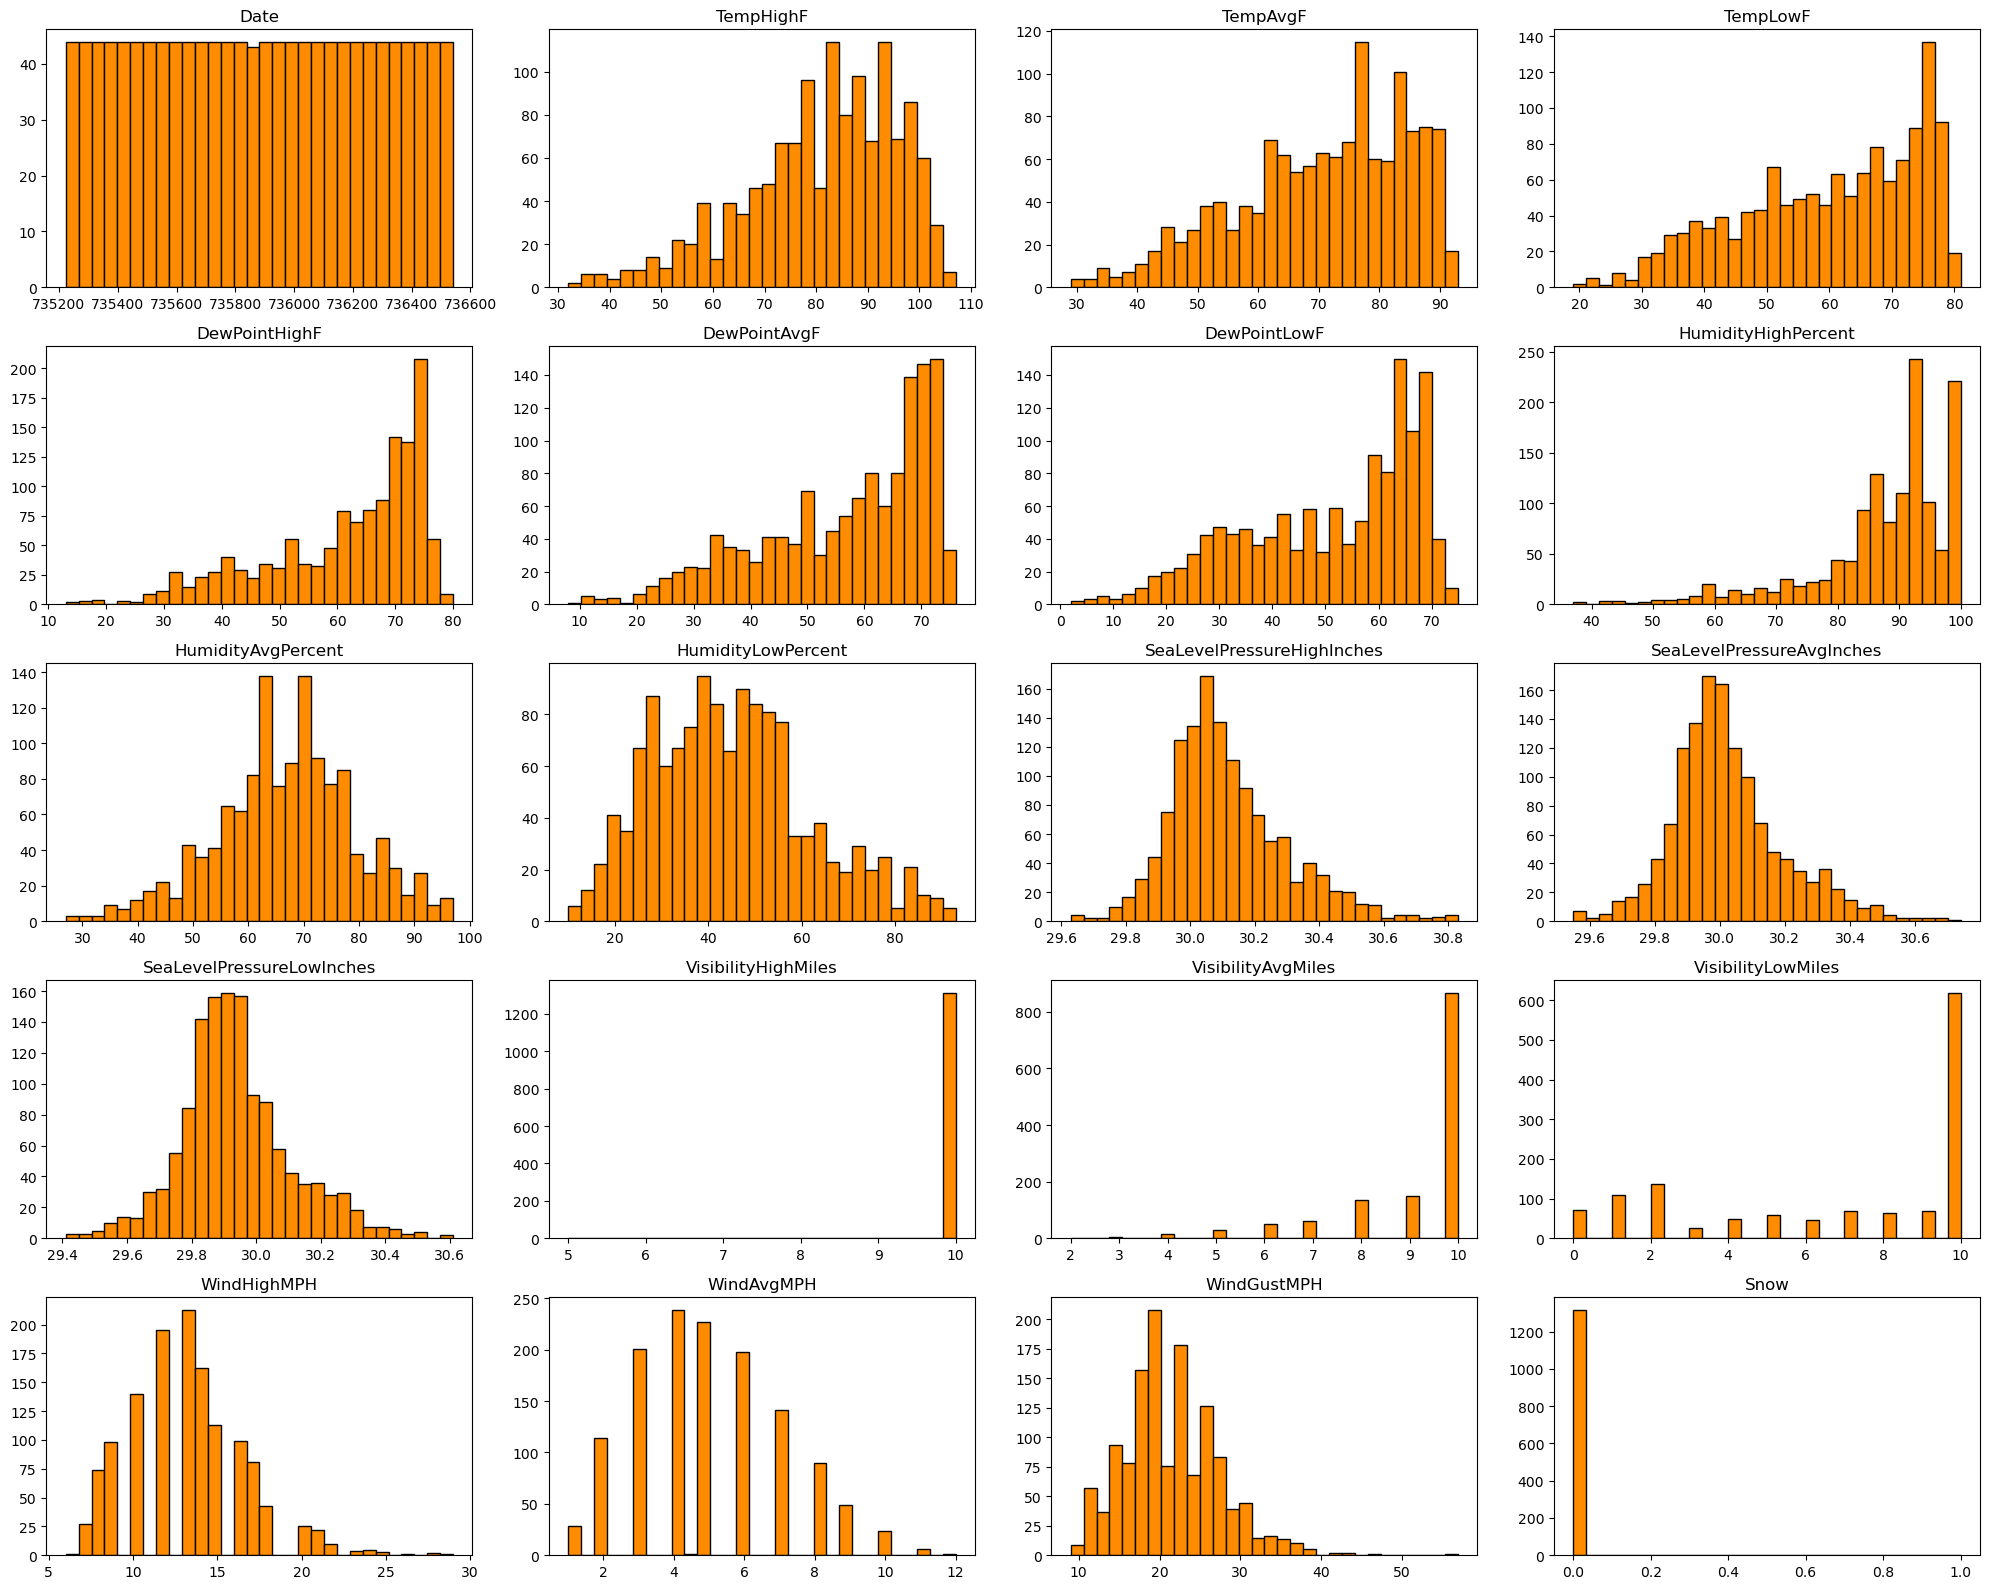

In [174]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(austin_fixed.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(austin_fixed.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(austin_fixed.columns[i])

plt.tight_layout()
plt.show()

In [176]:
scaler = MinMaxScaler() 

In [178]:
#el transform lo hago para ver si asi mejora mi modelo al comprimir los valores de 0 a 1
#porque lo tenemos en dolares 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [180]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train) #aqui me esta tomando valores entre 0 y 1

predictions_xgb_2 = xgbr.predict(X_test_scaled) #esta tomando valores entre 0 y 1

In [182]:
#La Y (target) no la transformo porque ya esta en las unidades originales, asi despues no tengo que cambiar todo otra vez a unidades originales. 
r2_scaler = r2_score(y_test, predictions_xgb_2)
RMSE_scaler = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_scaler = mean_squared_error(y_test, predictions_xgb_2)
MAE_scaler = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_scaler, 4))
print("RMSE = ", round(RMSE_scaler, 4))
print("The value of the metric MSE is ", round(MSE_scaler, 4))
print("MAE = ", round(MAE_scaler, 4))

R2 =  0.9955
RMSE =  0.9677
The value of the metric MSE is  0.9365
MAE =  0.5079


C:\Users\astri\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<h2 style="color: #FF6347;">Normalization with StandardScaler</h2>

In [185]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [187]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [189]:
r2_xg_stand = r2_score(y_test, predictions_xgb_2)
RMSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_stand = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_stand, 4))
print("RMSE = ", round(RMSE_xg_stand, 4))
print("The value of the metric MSE is ", round(MSE_xg_stand, 4))
print("MAE = ", round(MAE_xg_stand, 4))

R2 =  0.9955
RMSE =  0.9677
The value of the metric MSE is  0.9365
MAE =  0.5079


C:\Users\astri\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<h2 style="color: #FF6347;">Normalization with Log Transform</h2>

In [205]:
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [207]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [209]:
r2_xg_log = r2_score(y_test, predictions_xgb_2)
RMSE_xg_log = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_log = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_log = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_log, 4))
print("RMSE = ", round(RMSE_xg_log, 4))
print("The value of the metric MSE is ", round(MSE_xg_log, 4))
print("MAE = ", round(MAE_xg_log, 4))

R2 =  0.9955
RMSE =  0.9677
The value of the metric MSE is  0.9365
MAE =  0.5079


C:\Users\astri\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<h2 style="color: #FF6347;">Improving it droppign multicollinearity features, en este caso buscamos lo contrario porque las columnas estan muy correlacionadas</h2>

In [214]:
austin_fixed.corrwith(austin_fixed["TempAvgF"]).sort_values(ascending=False)

TempAvgF                      1.000000
TempHighF                     0.970655
TempLowF                      0.968573
DewPointAvgF                  0.895697
DewPointHighF                 0.881691
DewPointLowF                  0.864774
HumidityHighPercent           0.214461
VisibilityAvgMiles            0.210626
Date                          0.191919
VisibilityLowMiles            0.113729
Thunderstorm                  0.093157
VisibilityHighMiles           0.090969
WindAvgMPH                    0.040446
WindGustMPH                   0.034515
HumidityAvgPercent            0.031632
WindHighMPH                   0.023317
Fog                          -0.033069
Snow                         -0.056192
HumidityLowPercent           -0.092830
Rain                         -0.105935
SeaLevelPressureLowInches    -0.537832
SeaLevelPressureAvgInches    -0.624401
SeaLevelPressureHighInches   -0.696277
dtype: float64

In [216]:
num_corr = round(austin_fixed.corr(), 2)

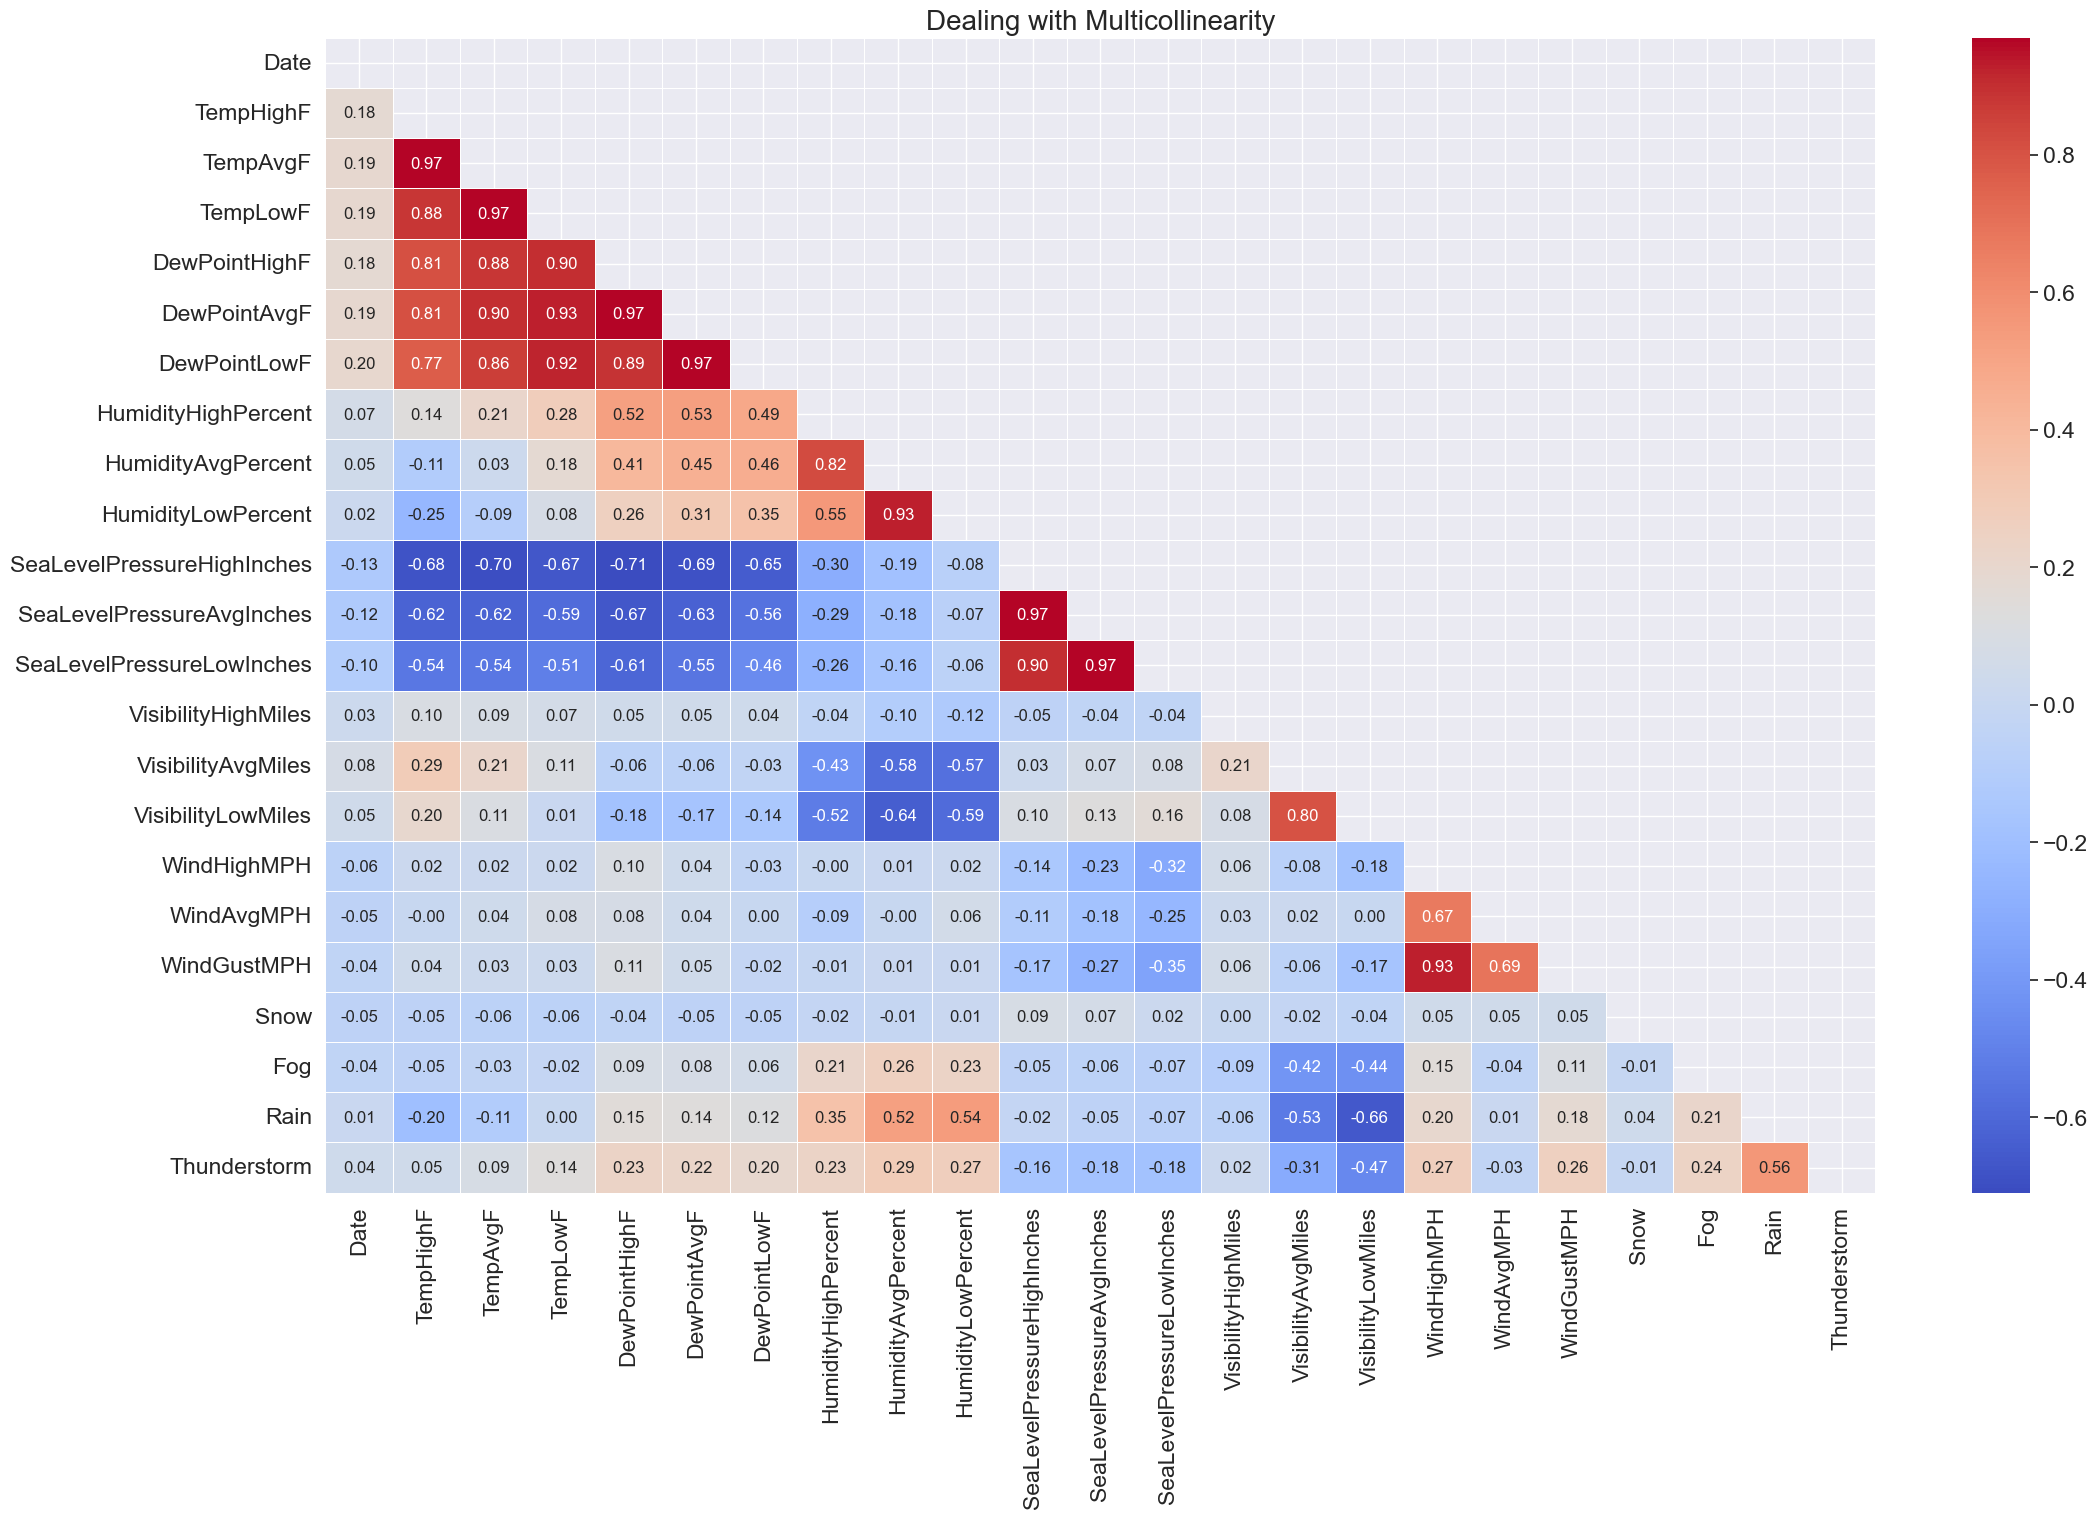

In [218]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [222]:
austin_fixed.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'Snow', 'Fog', 'Rain', 'Thunderstorm'],
      dtype='object')

In [224]:
austin_fixed.shape

(1319, 23)

### Ejemplo 1

In [249]:
X_new = X.drop(["TempHighF", "DewPointHighF", "DewPointLowF", "HumidityHighPercent","HumidityLowPercent","SeaLevelPressureHighInches","SeaLevelPressureLowInches","VisibilityHighMiles","VisibilityLowMiles","WindHighMPH"], axis=1)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [253]:
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [255]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [257]:
r2_ej = r2_score(y_test, predictions_xgb_2)
RMSE_ej = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_ej = mean_squared_error(y_test, predictions_xgb_2)
MAE_ej = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_ej, 4))
print("RMSE = ", round(RMSE_ej, 4))
print("The value of the metric MSE is ", round(MSE_ej, 4))
print("MAE = ", round(MAE_ej, 4))

R2 =  0.9733
RMSE =  2.3462
The value of the metric MSE is  5.5046
MAE =  1.6861


C:\Users\astri\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Conclusion: en este proyecto vimos que al hacer los modelos todos nos daban uN R2 de .997 lo cual era muy alto asi que quitamos columnas para en lugar de mejorar el modelo bajar las correlaciones y asi tener un R2 de .9733. Concluimos que primero seria quitar las columnas de high y low y despues hacer el modelo de machine learning y ya despues podriamos hacer las mejoras como vimos en clase.